Find solution to easy pentomino problem.

First, try to solve classic tetomino problem (3\*7). Then, Untouchable 11 problem for simple board (19\*17)


<img src="tetomino.png" alt="Drawing" style="width: 400px;"/>

This can be modeled as "the exact cover" problem and solved just by solving a linear system.

In [1]:
import numpy as np
import pandas as pd

In [238]:
np.set_printoptions(threshold=1000)

In [3]:
# 0: straight (1 possibility for this 3*7 board, horizontal) 
# 1: sqaure   (1 possibility)
# 2: T        (4 possibility)
# 3: L        (4 possibility)
# 4: skew     (4 possibility)
# in order, they are programmed correpsonds to indexes 0-13 as follows
rec_shapes = [(1,4), # straight
              (2,2), # square
              (2,3), (2,3), (3,2), (3,2), # t
              (2,3), (2,3), (3,2), (3,2), # l
              (2,3), (2,3), (3,2), (3,2), # skew
             ]
# relative positions cannot filled within its smallest bounding rectangle
idx_unfill = [ [],
               [],
              [3,5], [0,2], [0,4], [1,5],
              [0,1], [1,2], [3,4], [4,5],
              [0,5], [2,3], [0,5], [1,4]
             ]  # within the rectangle

In [102]:
# given (smallest bound) rectangle and its top-left index, return the number of coordinates
def rec_all_filled_coords(rec_shape, board_shape):
    rec_row, rec_col = rec_shape
    boa_row, boa_col = board_shape
    # get base coords for shape with left-top at (0,0)
    rec_indexes = []
    for R in range(rec_row):
        for C in range(rec_col):
            rec_indexes.append(int(R*boa_col+C))
    
    all_possible_pos = []
    rec_row_max = boa_row - rec_row + 1
    rec_col_max = boa_col - rec_col + 1
    for r in range(rec_row_max):
        for c in range(rec_col_max):
            # for each top-left position, get all 
            add_ = int(r*boa_col+c)
            new_pos = [v+add_ for v in rec_indexes]
            all_possible_pos.append(new_pos)  # if titris position is known, one can easily get true filled position for them
    return all_possible_pos

# given specific
def all_filled_coords(plan_id, board_shape, print_all=False):
    rec_shape = rec_shapes[plan_id]
    unfill_idx= idx_unfill[plan_id]
    rec_all_pos = rec_all_filled_coords(rec_shape, board_shape)
    # display(rec_all_pos)
    tet_all_pos = [[ pos for i, pos in enumerate(rec_pos) if i not in unfill_idx] for rec_pos in rec_all_pos ]
    if print_all:
        display(rec_all_pos)
        display(tet_all_pos)
    return tet_all_pos

In [103]:
test_tet_pos = all_filled_coords(0, board_shape=(3,7), print_all=True)

[[0, 1, 2, 3],
 [1, 2, 3, 4],
 [2, 3, 4, 5],
 [3, 4, 5, 6],
 [7, 8, 9, 10],
 [8, 9, 10, 11],
 [9, 10, 11, 12],
 [10, 11, 12, 13],
 [14, 15, 16, 17],
 [15, 16, 17, 18],
 [16, 17, 18, 19],
 [17, 18, 19, 20]]

[[0, 1, 2, 3],
 [1, 2, 3, 4],
 [2, 3, 4, 5],
 [3, 4, 5, 6],
 [7, 8, 9, 10],
 [8, 9, 10, 11],
 [9, 10, 11, 12],
 [10, 11, 12, 13],
 [14, 15, 16, 17],
 [15, 16, 17, 18],
 [16, 17, 18, 19],
 [17, 18, 19, 20]]

In [6]:
test_tet_pos = all_filled_coords(3, board_shape=(3,7), print_all=True)

[[0, 1, 2, 7, 8, 9],
 [1, 2, 3, 8, 9, 10],
 [2, 3, 4, 9, 10, 11],
 [3, 4, 5, 10, 11, 12],
 [4, 5, 6, 11, 12, 13],
 [7, 8, 9, 14, 15, 16],
 [8, 9, 10, 15, 16, 17],
 [9, 10, 11, 16, 17, 18],
 [10, 11, 12, 17, 18, 19],
 [11, 12, 13, 18, 19, 20]]

[[1, 7, 8, 9],
 [2, 8, 9, 10],
 [3, 9, 10, 11],
 [4, 10, 11, 12],
 [5, 11, 12, 13],
 [8, 14, 15, 16],
 [9, 15, 16, 17],
 [10, 16, 17, 18],
 [11, 17, 18, 19],
 [12, 18, 19, 20]]

In [7]:
test_tet_pos = all_filled_coords(6, board_shape=(3,7), print_all=True)

[[0, 1, 2, 7, 8, 9],
 [1, 2, 3, 8, 9, 10],
 [2, 3, 4, 9, 10, 11],
 [3, 4, 5, 10, 11, 12],
 [4, 5, 6, 11, 12, 13],
 [7, 8, 9, 14, 15, 16],
 [8, 9, 10, 15, 16, 17],
 [9, 10, 11, 16, 17, 18],
 [10, 11, 12, 17, 18, 19],
 [11, 12, 13, 18, 19, 20]]

[[2, 7, 8, 9],
 [3, 8, 9, 10],
 [4, 9, 10, 11],
 [5, 10, 11, 12],
 [6, 11, 12, 13],
 [9, 14, 15, 16],
 [10, 15, 16, 17],
 [11, 16, 17, 18],
 [12, 17, 18, 19],
 [13, 18, 19, 20]]

In [22]:
def get_shape_id(plan_id):
    if plan_id ==0:
        return 0
    if plan_id ==1:
        return 1
    if plan_id <=5:
        return 2
    if plan_id <=9:
        return 3
    return 4

# generate all possible positions for all tetris plan
# plan is coded as such: (t1, t2, t3, t4, plan_id)
# this is turned directly into the indexes of ones
def get_all_plans():
    num_tets = len(rec_shapes)
    all_poitions = []
    for tets_id in range(num_tets):
        id_plans = all_filled_coords(tets_id)
        object_id = get_shape_id(tets_id)
        id_plans = [[object_id]+p for p in id_plans]
        all_poitions += id_plans
    return all_poitions
all_positions = get_all_plans()

In [23]:
# there are 140 possibilities for tetris
print(len(all_positions))
display(all_positions[:5])
display(all_positions[-5:])

120


[[0, 0, 1, 2, 3],
 [0, 1, 2, 3, 4],
 [0, 2, 3, 4, 5],
 [0, 3, 4, 5, 6],
 [0, 7, 8, 9, 10]]

[[4, 1, 8, 9, 16],
 [4, 2, 9, 10, 17],
 [4, 3, 10, 11, 18],
 [4, 4, 11, 12, 19],
 [4, 5, 12, 13, 20]]

In [24]:
# reformat this into matrix
mat_tiles = np.zeros((120,21)) # 21 tiles
mat_tetris= np.zeros((120,5)) # 5 tetris shapes
def fill_ones(mat_tiles, mat_tetris, all_positions):
    for i, pos in enumerate(all_positions):
        for j, item in enumerate(pos):
            if j==0: # tetris id
                mat_tetris[i, item] = 1
            else: # tile
                mat_tiles[i, item] = 1
    return mat_tiles, mat_tetris

mat_tiles, mat_tetris = fill_ones(mat_tiles, mat_tetris, all_positions)

In [25]:
print(mat_tiles.shape)
print(mat_tetris.shape)

(120, 21)
(120, 5)


In [33]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
mat1_pd = pd.DataFrame(mat_tiles)
mat1_pd = mat1_pd.astype(int)
# display(mat1_pd)

In [27]:
# optional: add more constraints (each tentris only appears once)
# index 21-> straight; 22: square; [23,26]:T; [27,30]:L; [31:34]:skew

In [28]:
import gurobipy as gp
from gurobipy import GRB

In [30]:
# try to solve by prime LP
m1 = gp.Model("puzzle prime")
# Create variables, whether use plan i
x = m1.addMVar(shape=120, vtype=GRB.BINARY, name="x")
# objective zero vector, and objective function
b1 = np.array([1]*21)
b2 = np.array([1]*5)
c = np.array([0.0]*120)
m1.setObjective(x @ c, GRB.MAXIMIZE)

In [31]:
m1.addConstr(mat_tiles.T @ x <= b1, name="c_tile")    # not all tiles needs to be filled
m1.addConstr(mat_tetris.T @ x == b2, name="c_tetris") # all shapes used exactly once!!!
m1.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 26 rows, 120 columns and 600 nonzeros
Model fingerprint: 0x29db436f
Variable types: 0 continuous, 120 integer (120 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 30 columns
Presolve time: 0.00s
Presolved: 26 rows, 90 columns, 482 nonzeros
Variable types: 0 continuous, 90 integer (90 binary)

Root relaxation: objective -0.000000e+00, 33 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   -0.00000    0   15          -   -0.00000      -     -    0s
H    0     0                      -0.0000000   -0.00000  0.00%     -    0s

Cutting planes:
  Gomory: 6
  

In [32]:
x.X

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [40]:
sel_mask = x.X.astype(bool)

# Visualize the result

In [43]:
def convert_idx2coords(lst):
    return [ (int(i/7), i%7) for i, item in enumerate(lst) if item==1]

In [44]:
# get selected rows
mat_tile_sel = mat_tiles[sel_mask, :]
mat_tile_sel = [ convert_idx2coords(lst) for lst in mat_tile_sel]
display(mat_tile_sel)

[[(2, 3), (2, 4), (2, 5), (2, 6)],
 [(0, 5), (0, 6), (1, 5), (1, 6)],
 [(0, 2), (0, 3), (0, 4), (1, 3)],
 [(1, 0), (2, 0), (2, 1), (2, 2)],
 [(0, 0), (0, 1), (1, 1), (1, 2)]]

In [75]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
from matplotlib import cm

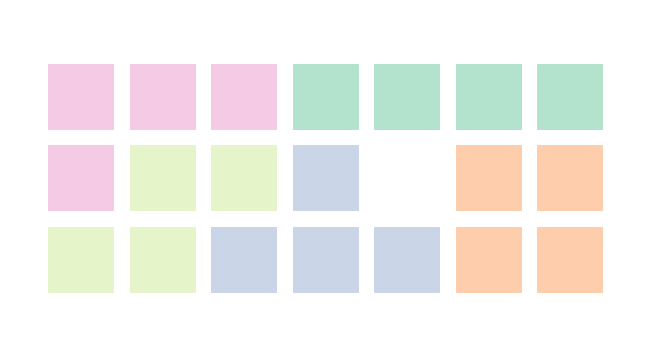

In [93]:
# Create figure and axes
mycolors= cm.get_cmap('Pastel2').colors
fig, ax = plt.subplots(figsize=(7*2, 3*2))
plt.xlim([-.5, 7.5])
plt.ylim([-.5, 3.5])

rect_lst = []
for i, plan_lst in enumerate(mat_tile_sel):
    for coords in plan_lst:
        coords = coords[::-1]
        rect = patches.Rectangle(coords, 0.8, 0.8, color=mycolors[i])
        ax.add_artist(rect)
        rect_lst.append(rect)
# plot all rect
ax.add_collection(PatchCollection(rect_lst))
ax.set_aspect('equal')
plt.axis('off')
plt.show()

# Try to solve *Untouchable-11* problem

The solution is exactly the same except needs more time to formulate and solve the problem.

<img src="untouchable-11.png" alt="Drawing" style="width: 400px;"/>

Just increase the margin with 0.5 tile

We will use the above A,B,C,D,E,F,G,H,I,J,K (or 0-10) to denote each piece in order

In [411]:
rec_shapes1 = {0:[(4, 3), (4, 3), (4, 3), (4, 3), (3, 4), (3, 4), (3, 4), (3, 4)], # 2*4 possibilities
               1:[(4, 3), (4, 3), (3, 4), (3, 4)], # 2*2 possibilities
               2:[(4, 3), (4, 3), (3, 4), (3, 4)], # orange
               3:[(4, 3), (4, 3), (3, 4), (3, 4)], # green
               4:[(4, 3), (4, 3), (3, 4), (3, 4)], # yellow
               5:[(4, 3), (4, 3), (4, 3), (4, 3), (3, 4), (3, 4), (3, 4), (3, 4)], # pink
               6:[(4, 3), (4, 3), (4, 3), (4, 3), (3, 4), (3, 4), (3, 4), (3, 4)], # grey
               7:[(4, 3), (4, 3), (3, 4), (3, 4)], # blue
               8:[(4, 3), (4, 3), (3, 4), (3, 4)], # purple
               9:[(2, 5), (2, 5), (5, 2), (5, 2)], # red
               10:[(4, 3), (4, 3), (4, 3), (4, 3), (3, 4), (3, 4), (3, 4), (3, 4)], # navy blue
              }

In [412]:
idx_unfill1 = {0:[[0,2,3,5,10,11], [0,2,3,5,9,10], [0,1,6,8,9,11], [1,2,6,8,9,11],
                    [2,3,4,8,10,11], [0,2,3,4,10,11], [0,1,7,8,9,11], [0,1,3,7,8,9]],
                 1:[[2,3,5,6,8,9], [0,3,5,6,8,11], [0,1,2,9,10,11], [1,2,3,8,9,10]],
                 2:[[0,2,5,6,9,11], [0,2,3,8,9,11], [0,2,3,8,9,11], [0,1,3,8,10,11]],
                 3:[[2,3,5,6,9,10], [0,3,5,8,10,11], [1,2,3,7,8,9], [0,1,7,9,10,11]],
                 4:[[0,2,3,5,9,11], [0,2,6,8,9,11], [0,2,3,8,10,11], [0,1,3,8,9,11]],
                 5:[[0,5,6,8,9,11], [2,3,6,8,9,11], [0,2,3,5,8,9], [0,2,3,5,6,11],
                    [0,2,3,9,10,11], [1,2,3,8,10,11], [0,1,3,8,9,10], [0,1,2,8,9,11]],
                 6:[[2,3,5,6,9,11], [0,2,3,6,8,11], [0,3,5,8,9,11], [0,2,5,6,8,9],
                    [0,2,3,8,9,10], [0,1,3,9,10,11], [0,1,2,8,10,11], [1,2,3,8,9,11]],
                 7:[[3,5,6,8,9,11], [0,2,3,5,6,8], [0,1,2,8,9,10], [1,2,3,9,10,11]],
                 8:[[1,2,5,6,9,10], [0,1,3,8,10,11], [2,3,4,7,8,9], [0,1,4,7,10,11]],
                 9:[[0,1,8,9], [3,4,5,6], [1,3,6,8], [0,2,7,9]],
                 10:[[1,2,5,6,9,11], [0,2,3,8,10,11], [0,1,3,8,9,11], [0,2,5,6,9,10],
                    [0,2,3,7,8,9],[0,1,3,4,10,11],[0,1,7,8,10,11],[2,3,4,8,9,11]]
                 }

In [413]:
def rec_all_filled_coords1(rec_shape, board_shape):
    rec_row, rec_col = rec_shape
    boa_row, boa_col = board_shape
    # get base coords for shape with left-top at (0,0)
    rec_indexes = []
    for R in range(rec_row):
        for C in range(rec_col):
            rec_indexes.append(int(R*boa_col+C))
    
    all_possible_pos = []
    rec_row_max = boa_row - rec_row + 1
    rec_col_max = boa_col - rec_col + 1
    for r in range(rec_row_max):
        for c in range(rec_col_max):
            # for each top-left position, get all 
            add_ = int(r*boa_col+c)
            new_pos = [v+add_ for v in rec_indexes]
            all_possible_pos.append(new_pos)  # if titris position is known, one can easily get true filled position for them
    return all_possible_pos

def all_filled_coords1(piece_id, board_shape, print_all=False):
    rec_shapes  = rec_shapes1[piece_id]
    unfill_idxes= idx_unfill1[piece_id]
    middle_lst = []
    for k, rec_shape in enumerate(rec_shapes): # for each plan
        unfill_idx = unfill_idxes[k]
        rec_all_pos = rec_all_filled_coords1(rec_shape, board_shape)
        # display(rec_all_pos)
        tet_all_pos = [[ pos for i, pos in enumerate(rec_pos) if i not in unfill_idx] for rec_pos in rec_all_pos ]
        middle_lst.append(tet_all_pos)
    if print_all:
        display(middle_lst)
    return middle_lst

In [421]:
# check all for piece 0 (hopefully this is correct)
bs = (12,12)
bs_fine = (12*2+2, 12*2+2)

test_tet_pos = all_filled_coords1(10, bs)
print(len(test_tet_pos))
print(len(test_tet_pos[0]))
# a list of list of list

8
90


In [422]:
def get_all_plans1():
    num_pieces = len(rec_shapes1)
    all_poitions = []
    for piece_id in range(num_pieces):
        piece_plans = all_filled_coords1(piece_id, bs) # a list of list of plans
        for plan_id, plans in enumerate(piece_plans):
            new_plans = [[piece_id]+p for p in plans]
            all_poitions += new_plans
    return all_poitions
all_positions = get_all_plans1()

In [447]:
print(len(all_positions))
display(all_positions[:5])
display(all_positions[-5:])

5392


[[0, 1, 13, 24, 25, 26, 36],
 [0, 2, 14, 25, 26, 27, 37],
 [0, 3, 15, 26, 27, 28, 38],
 [0, 4, 16, 27, 28, 29, 39],
 [0, 5, 17, 28, 29, 30, 40]]

[[10, 112, 113, 125, 126, 127, 138],
 [10, 113, 114, 126, 127, 128, 139],
 [10, 114, 115, 127, 128, 129, 140],
 [10, 115, 116, 128, 129, 130, 141],
 [10, 116, 117, 129, 130, 131, 142]]

In [424]:
def change_to_finer_coords(pos, bs, if_print=False):
    r, c = bs
    piece_id = pos[0]
    indexes = pos[1:]
    # convert to row, col
    lst_rc = [ (int(idx/c), idx%c) for idx in indexes]
    if if_print:
        print(lst_rc)
    # convert from coarse to finer
    finer_coords = []
    for R,C in lst_rc: # also, add new margin
        temp_recs = []
        # row left, column left
        RL, CL = 2*R, 2*C
        RR, CR = RL+3, CL+3
        # 16 possible finer values
        for R in range(RL,RR+1):
            for C in range(CL,CR+1):
                temp_recs.append((R,C))
        finer_coords += temp_recs
    finer_coords = list(set(finer_coords)) # filter useless coords
    new_c = 2*c+2
    finer_lst = [piece_id] + sorted([ x*new_c+y for x,y in finer_coords ])
    return finer_lst

def change_to_finer_coords_all(positions, bs):
    return [change_to_finer_coords(pos, bs) for pos in positions]

def convert_idx2coords2(lst, bs): # for coarse network
    r,c = bs
    return [ (int(item/c), item%c) for i, item in enumerate(lst)]

In [425]:
my_r1 = change_to_finer_coords(all_positions[-1], bs, if_print=False)
print(my_r1)
my_r2 = convert_idx2coords2(my_r1[1:], bs_fine)
print(my_r2)

[10, 484, 485, 486, 487, 488, 489, 510, 511, 512, 513, 514, 515, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 590, 591, 592, 593, 594, 595, 596, 597, 616, 617, 618, 619, 620, 621, 622, 623, 644, 645, 646, 647, 670, 671, 672, 673]
[(18, 16), (18, 17), (18, 18), (18, 19), (18, 20), (18, 21), (19, 16), (19, 17), (19, 18), (19, 19), (19, 20), (19, 21), (20, 16), (20, 17), (20, 18), (20, 19), (20, 20), (20, 21), (20, 22), (20, 23), (20, 24), (20, 25), (21, 16), (21, 17), (21, 18), (21, 19), (21, 20), (21, 21), (21, 22), (21, 23), (21, 24), (21, 25), (22, 18), (22, 19), (22, 20), (22, 21), (22, 22), (22, 23), (22, 24), (22, 25), (23, 18), (23, 19), (23, 20), (23, 21), (23, 22), (23, 23), (23, 24), (23, 25), (24, 20), (24, 21), (24, 22), (24, 23), (25, 20), (25, 21), (25, 22), (25, 23)]


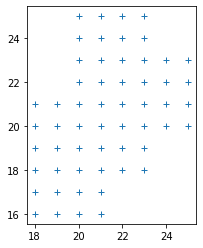

In [426]:
xs = [ item[0] for item in my_r2]
ys = [ item[1] for item in my_r2]
plt.plot(xs,ys, '+')
plt.gca().set_aspect('equal')

In [427]:
# hopefully the conversion is correct
fine_positions = change_to_finer_coords_all(all_positions, bs)

In [428]:
print(len(fine_positions))
print(fine_positions[0][:20])
print(fine_positions[1][:20])
print(fine_positions[2][:20])
print(fine_positions[-1][:20])
print(fine_positions[-2][:20])
print(fine_positions[-3][:20])

5392
[0, 2, 3, 4, 5, 28, 29, 30, 31, 54, 55, 56, 57, 80, 81, 82, 83, 104, 105, 106]
[0, 4, 5, 6, 7, 30, 31, 32, 33, 56, 57, 58, 59, 82, 83, 84, 85, 106, 107, 108]
[0, 6, 7, 8, 9, 32, 33, 34, 35, 58, 59, 60, 61, 84, 85, 86, 87, 108, 109, 110]
[10, 484, 485, 486, 487, 488, 489, 510, 511, 512, 513, 514, 515, 536, 537, 538, 539, 540, 541, 542]
[10, 482, 483, 484, 485, 486, 487, 508, 509, 510, 511, 512, 513, 534, 535, 536, 537, 538, 539, 540]
[10, 480, 481, 482, 483, 484, 485, 506, 507, 508, 509, 510, 511, 532, 533, 534, 535, 536, 537, 538]


In [430]:
(12*2+2)*(12*2+2) # 26 * 26

676

In [448]:
# reformat this into matrix
M_tiles  = np.zeros((5392,(12*2+2)*(12*2+2))) # 676 tiles
M_tetris = np.zeros((5392,11)) # 11 tetris pieces
def fill_ones(mat_tiles, mat_tetris, all_positions):
    for i, pos in enumerate(all_positions):
        for j, item in enumerate(pos):
            if j==0: # tetris piece id
                mat_tetris[i, item] = 1
            else: # tile
                mat_tiles[i, item] = 1
    return mat_tiles, mat_tetris

M_tiles, M_tetris = fill_ones(M_tiles, M_tetris, fine_positions)

In [449]:
M_tiles_coarse = []

In [450]:
print(M_tiles.shape)
print(M_tetris.shape)
# check no column contains zero
# print(np.where(~M_tiles.any(axis=1))[0])
# print(np.where(~M_tiles.any(axis=1))[0])
# print(np.where(~M_tetris.any(axis=1))[0])
# print(np.where(~M_tetris.any(axis=1))[0])

(5392, 676)
(5392, 11)


In [451]:
import gurobipy as gp
from gurobipy import GRB

In [452]:
# try to solve by prime LP
m2 = gp.Model("puzzle prime")
# Create variables, whether use plan i
x = m2.addMVar(shape=5392, vtype=GRB.BINARY, name="x")
# objective zero vector, and objective function
b1 = np.array([1]*676)
b2 = np.array([1]*11)
c = np.array([0.0]*5392)
# change goal: maximize
m2.setObjective(x @ c, GRB.MAXIMIZE)

In [453]:
m2.addConstr(M_tiles.T @ x <= b1, name="c_tile")    # not all tiles needs to be filled
m2.addConstr(M_tetris.T @ x == b2, name="c_tetris") # all shapes used & used exactly once!!!
m2.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 687 rows, 5392 columns and 307344 nonzeros
Model fingerprint: 0xe0877f46
Variable types: 0 continuous, 5392 integer (5392 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 555 rows and 512 columns
Presolve time: 0.19s
Presolved: 132 rows, 4880 columns, 68496 nonzeros
Variable types: 0 continuous, 4880 integer (4880 binary)

Root relaxation: objective -0.000000e+00, 579 iterations, 0.06 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   -0.00000    0   98          -   -0.00000      -     -    0s
     0     0   -0.00000    0  114          -   -0.00000      -     -    0s
     0     

In [454]:
x.X.sum()

11.0

# Visualize the result

In [455]:
sel_mask = x.X.astype(bool)

In [456]:
def convert_idx2coords1(lst, bs): # for coarse network
    r,c = bs
    return [ (int(i/c), i%c) for i, item in enumerate(lst) if item==1]

In [457]:
# get selected rows
M_tiles_sel = M_tiles[sel_mask, :]
M_tiles_sel = [ convert_idx2coords1(lst,bs=bs_fine) for lst in M_tiles_sel]
print(M_tiles_sel)

[[(18, 18), (18, 19), (18, 20), (18, 21), (19, 18), (19, 19), (19, 20), (19, 21), (20, 18), (20, 19), (20, 20), (20, 21), (20, 22), (20, 23), (20, 24), (20, 25), (21, 18), (21, 19), (21, 20), (21, 21), (21, 22), (21, 23), (21, 24), (21, 25), (22, 16), (22, 17), (22, 18), (22, 19), (22, 20), (22, 21), (22, 22), (22, 23), (22, 24), (22, 25), (23, 16), (23, 17), (23, 18), (23, 19), (23, 20), (23, 21), (23, 22), (23, 23), (23, 24), (23, 25), (24, 16), (24, 17), (24, 18), (24, 19), (24, 20), (24, 21), (25, 16), (25, 17), (25, 18), (25, 19), (25, 20), (25, 21)], [(16, 6), (16, 7), (16, 8), (16, 9), (16, 10), (16, 11), (17, 6), (17, 7), (17, 8), (17, 9), (17, 10), (17, 11), (18, 6), (18, 7), (18, 8), (18, 9), (18, 10), (18, 11), (19, 6), (19, 7), (19, 8), (19, 9), (19, 10), (19, 11), (20, 6), (20, 7), (20, 8), (20, 9), (21, 6), (21, 7), (21, 8), (21, 9), (22, 4), (22, 5), (22, 6), (22, 7), (22, 8), (22, 9), (23, 4), (23, 5), (23, 6), (23, 7), (23, 8), (23, 9), (24, 4), (24, 5), (24, 6), (24, 

In [458]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
from matplotlib import cm

20


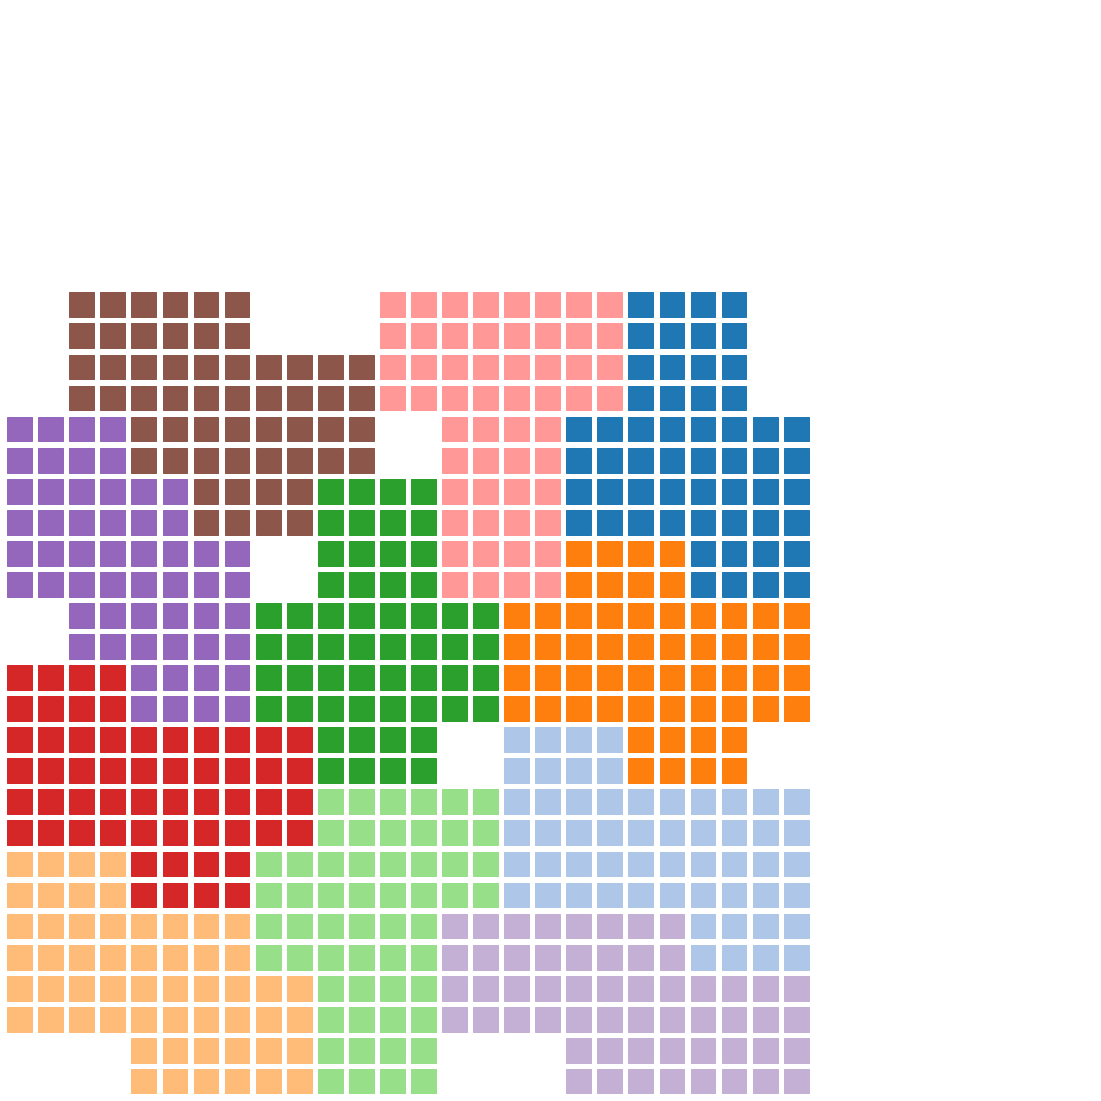

In [459]:
# Create figure and axes
mycolors= cm.get_cmap('tab20').colors
print(len(mycolors))
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlim([0, 35])
plt.ylim([0, 35])

rect_lst = []
for i, plan_lst in enumerate(M_tiles_sel):
    for coords in plan_lst:
        # coords = coords[::-1]
        rect = patches.Rectangle(coords, 0.8, 0.8, color=mycolors[i])
        ax.add_artist(rect)
        rect_lst.append(rect)
# plot all rect
ax.add_collection(PatchCollection(rect_lst))
ax.set_aspect('equal')
plt.axis('off')
plt.show()

In [460]:
def convert_idx2coords1(ll, bs): # for coarse network
    r,c = bs
    return_lst = []
    for lst in ll:
        return_lst.append( [ (int(item/c), item%c) for item in lst[1:]])
    return return_lst
# get selected rows
ap = np.array(all_positions)
m_tiles_sel = ap[sel_mask,:]
print(m_tiles_sel)
m_tiles_sel = convert_idx2coords1(m_tiles_sel, bs)
print(m_tiles_sel)

[[  0 117 129 130 131 140 141]
 [  1  99 100 111 123 134 135]
 [  2 102 114 115 125 126 138]
 [  3   1   2  13  24  25  36]
 [  4  54  65  66  67  68  78]
 [  5  50  60  61  62  63  75]
 [  6   4   5  16  27  28  40]
 [  7  83  92  93  94  95 107]
 [  8   8   9  19  20  30  31]
 [  9  85  97 108 109 120 132]
 [ 10  23  34  35  45  46  58]]
[[(9, 9), (10, 9), (10, 10), (10, 11), (11, 8), (11, 9)], [(8, 3), (8, 4), (9, 3), (10, 3), (11, 2), (11, 3)], [(8, 6), (9, 6), (9, 7), (10, 5), (10, 6), (11, 6)], [(0, 1), (0, 2), (1, 1), (2, 0), (2, 1), (3, 0)], [(4, 6), (5, 5), (5, 6), (5, 7), (5, 8), (6, 6)], [(4, 2), (5, 0), (5, 1), (5, 2), (5, 3), (6, 3)], [(0, 4), (0, 5), (1, 4), (2, 3), (2, 4), (3, 4)], [(6, 11), (7, 8), (7, 9), (7, 10), (7, 11), (8, 11)], [(0, 8), (0, 9), (1, 7), (1, 8), (2, 6), (2, 7)], [(7, 1), (8, 1), (9, 0), (9, 1), (10, 0), (11, 0)], [(1, 11), (2, 10), (2, 11), (3, 9), (3, 10), (4, 10)]]


20


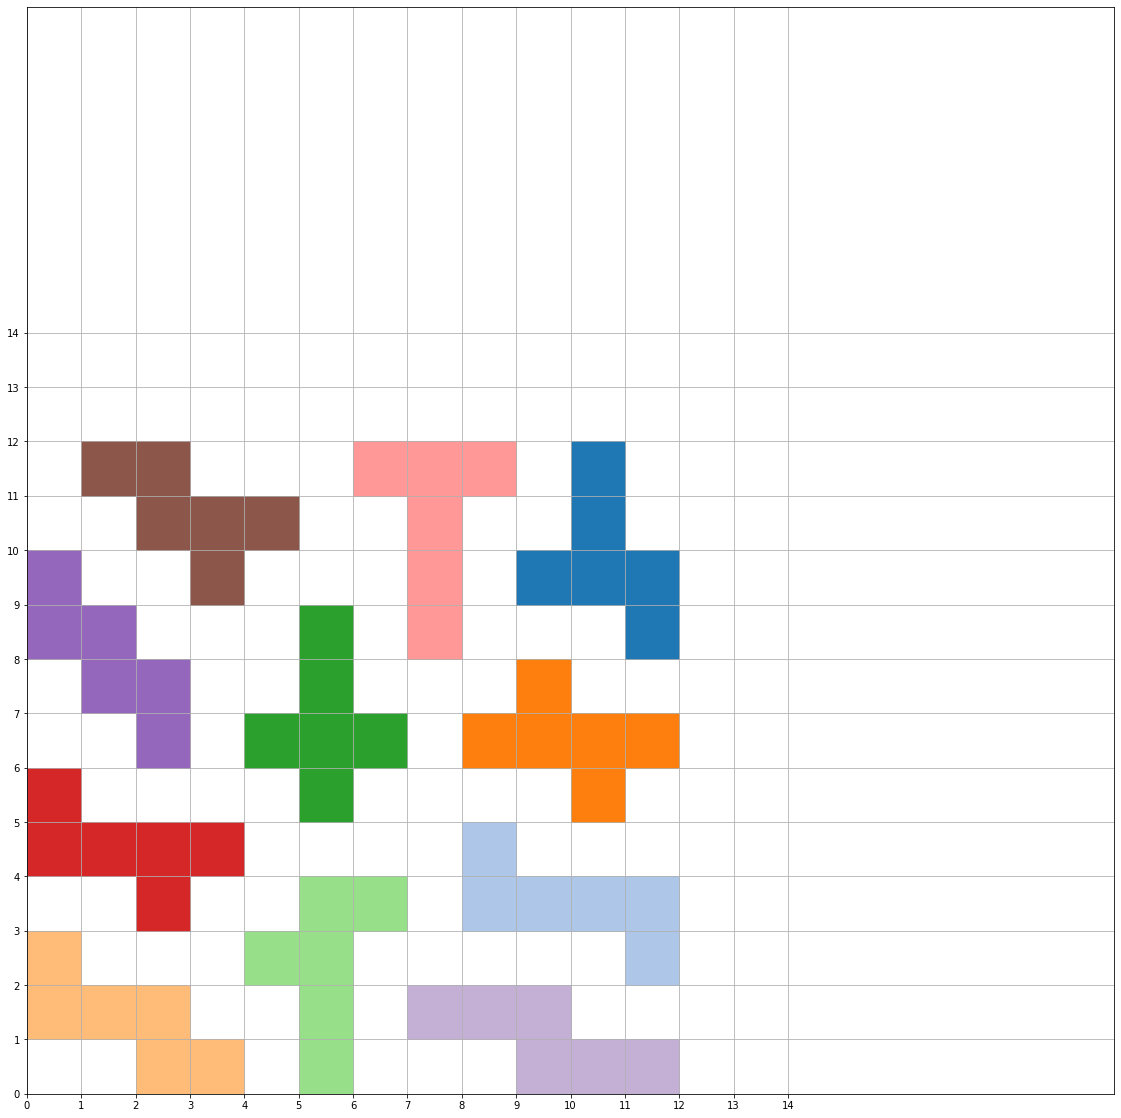

In [462]:
# Create figure and axes
mycolors= cm.get_cmap('tab20').colors
print(len(mycolors))
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlim([0, 20])
plt.ylim([0, 20])

rect_lst = []
for i, plan_lst in enumerate(m_tiles_sel):
    for coords in plan_lst:
        # coords = coords[::-1]
        rect = patches.Rectangle(coords, 1, 1, color=mycolors[i])
        ax.add_artist(rect)
        rect_lst.append(rect)
# plot all rect
ax.add_collection(PatchCollection(rect_lst))
ax.set_aspect('equal')
major_ticks = np.arange(0, 15, 1)
ax.set_xticks(major_ticks)
ax.set_yticks(major_ticks)
# plt.axis('off')
plt.grid()
plt.show()